In [ ]:
#크롤링 정책
#robots.txt : 웹페이지의 크롤링 정책 설명한 페이지
#크롤링법 X : 과도한 크롤링으로 서비스에 영향을 주었을 경우 업무방해 혐의로 고소당할 수 있음
#법적문제 : 지적재산권, 서비스과부화, 데이터 사용 표준
#API 사용 : 데이터를 가지고 있는 업체에서 데이터를 가져갈수 있도록 하는 서비스

### Naver Rest API
- 파파고 번역 api
- 통합검색어 트렌드 api

In [1]:
import pandas as pd
import requests, json

#### 0. request token 얻기
- `https://developers.naver.com`
- 1. Request Token 얻기 : 애플리케이션등록 -> app_key 획득
- 2. app_key를 이용해서 데이터 가져오기

In [2]:
CLIENT_ID, CLIENT_SECRET = "rKnn8JCrdCjlfVaBEJkr", "dydlL7Tztv"

#### 1. 파파고 번역 api
- `https://developers.naver.com/docs/papago/`
- 사용법
    - `https://developers.naver.com/docs/papago/papago-nmt-api-reference.md`

In [3]:
# 1. API 문서 : URL을 찾는 방법
ko_txt ='웹크롤링은 재미있다.'
url='https://openapi.naver.com/v1/papago/n2mt'
headers={
    'Content-Type' : 'application/json',
    'X-Naver-Client-Id' : CLIENT_ID,
    'X-Naver-Client-Secret' : CLIENT_SECRET  
}
params = {'source': 'ko', 'target': 'en', 'text' : ko_txt}

In [ ]:
# 2. request(URL,key,ko_txt) > response : json(str)

In [8]:
response = requests.post(url,json.dumps(params)) #json.dumps 데이터를 주고받을땐 한국어 불가, 영문,숫자만 가능 이걸 인코딩하여 전해주는게 json.dumps
response

<Response [401]>

In [7]:
json.dumps(params)

'{"source": "ko", "target": "en", "text": "\\uc6f9\\ud06c\\ub864\\ub9c1\\uc740 \\uc7ac\\ubbf8\\uc788\\ub2e4."}'

In [10]:
response = requests.post(url,json.dumps(params),headers=headers)
response

<Response [200]>

In [11]:
response.text

'{"message":{"result":{"srcLangType":"ko","tarLangType":"en","translatedText":"Webcrawling is fun.","engineType":"N2MT","pivot":null,"dict":null,"tarDict":null,"modelVer":"1.5.8|enko.2022.0929.03|koen.2022.1206.02"},"@type":"response","@service":"naverservice.nmt.proxy","@version":"1.0.0"}}'

In [ ]:
# 3.json(str) : en_txt

In [15]:
response.json()

{'message': {'result': {'srcLangType': 'ko',
   'tarLangType': 'en',
   'translatedText': 'Webcrawling is fun.',
   'engineType': 'N2MT',
   'pivot': None,
   'dict': None,
   'tarDict': None,
   'modelVer': '1.5.8|enko.2022.0929.03|koen.2022.1206.02'},
  '@type': 'response',
  '@service': 'naverservice.nmt.proxy',
  '@version': '1.0.0'}}

In [14]:
en_txt=response.json()['message']['result']['translatedText']
en_txt

'Webcrawling is fun.'

In [18]:
#함수로 만들기
def translate(txt, source='ko', target='en') : 
    CLIENT_ID, CLIENT_SECRET = "rKnn8JCrdCjlfVaBEJkr", "dydlL7Tztv"
    url='https://openapi.naver.com/v1/papago/n2mt'
    headers={
        'Content-Type' : 'application/json',
        'X-Naver-Client-Id' : CLIENT_ID,
        'X-Naver-Client-Secret' : CLIENT_SECRET  
    }
    params = {'source': source, 'target': target, 'text' : txt}
    response = requests.post(url,json.dumps(params),headers=headers)
    return response.json()['message']['result']['translatedText']

In [19]:
translate('데이터 사이언스는 재미있습니다.')

'Data Science is fun.'

In [20]:
df = pd.DataFrame({
    'id' : list('AB'),
    'title' : ['인공지능 스쿨 화이팅', '데이터 크롤링']
})
df

,id,title
0,A,인공지능 스쿨 화이팅
1,B,데이터 크롤링


In [22]:
df['en_title'] = df['title'].apply(translate)
df

,id,title,en_title
0,A,인공지능 스쿨 화이팅,"AI school, fighting!"
1,B,데이터 크롤링,Crawling data


In [23]:
df.to_excel('en_title.xlsx', index=False, encoding='utf-8-sig')

%ls

In [25]:
pd.read_excel('en_title.xlsx')

,id,title,en_title
0,A,인공지능 스쿨 화이팅,"AI school, fighting!"
1,B,데이터 크롤링,Crawling data


#### 2. 통합검색어 트렌드 api
- 서비스 : `https://datalab.naver.com/keyword/trendSearch.naver`
- 내 애플리케이션 > dss 애플리케이션 > API 설정 > 데이터랩(검색어 트렌드) 추가
- 사용법 : `https://developers.naver.com/docs/serviceapi/datalab/search/search.md#통합-검색어-트렌드`

In [29]:
%whos #선언되어 있는 변수

Variable        Type         Data/Info
--------------------------------------
CLIENT_ID       str          rKnn8JCrdCjlfVaBEJkr
CLIENT_SECRET   str          dydlL7Tztv
df              DataFrame      id        title        <...>크롤링         Crawling data
en_txt          str          Webcrawling is fun.
headers         dict         n=3
json            module       <module 'json' from 'c:\\<...>\lib\\json\\__init__.py'>
ko_txt          str          웹크롤링은 재미있다.
params          dict         n=3
pd              module       <module 'pandas' from 'c:<...>es\\pandas\\__init__.py'>
requests        module       <module 'requests' from '<...>\\requests\\__init__.py'>
response        Response     <Response [200]>
translate       function     <function translate at 0x0000021C4BDB4700>
url             str          https://openapi.naver.com/v1/papago/n2mt


In [ ]:
%reset #임포트된거 전부 날림

In [26]:
#1, API 문서 : URL

In [33]:
url='https://openapi.naver.com/v1/datalab/search'
params = {
    'startDate' : '2018-01-01',
    'endDate' : '2023-02-16',
    'timeUnit' : 'month',
    'keywordGroups' : [
        {'groupName' : '트위터', 'keywords' : ['트위터', '트윗']},
        {'groupName' : '페이스북', 'keywords' : ['페이스북', '페북']},
        {'groupName' : '인스타그램', 'keywords' : ['인스타그램', '인스타']}    
    ]
}

In [34]:
headers={
    'Content-Type' : 'application/json',
    'X-Naver-Client-Id' : CLIENT_ID,
    'X-Naver-Client-Secret' : CLIENT_SECRET  
}

In [27]:
# 2. request(URL) > response : json(str)

In [35]:
response = requests.post(url,json.dumps(params),headers=headers)
response

<Response [200]>

In [ ]:
# 3. Json(str) > 

In [36]:
results=response.json()['results']
type(results)

list

In [38]:
#columns : period, ratio, title
results[0]

{'title': '트위터',
 'keywords': ['트위터', '트윗'],
 'data': [{'period': '2018-01-01', 'ratio': 14.59502},
  {'period': '2018-02-01', 'ratio': 13.0238},
  {'period': '2018-03-01', 'ratio': 12.97953},
  {'period': '2018-04-01', 'ratio': 12.82991},
  {'period': '2018-05-01', 'ratio': 13.05391},
  {'period': '2018-06-01', 'ratio': 13.34512},
  {'period': '2018-07-01', 'ratio': 13.02773},
  {'period': '2018-08-01', 'ratio': 13.45399},
  {'period': '2018-09-01', 'ratio': 12.83755},
  {'period': '2018-10-01', 'ratio': 13.05677},
  {'period': '2018-11-01', 'ratio': 12.77338},
  {'period': '2018-12-01', 'ratio': 12.86931},
  {'period': '2019-01-01', 'ratio': 13.31172},
  {'period': '2019-02-01', 'ratio': 11.74776},
  {'period': '2019-03-01', 'ratio': 11.82313},
  {'period': '2019-04-01', 'ratio': 12.32991},
  {'period': '2019-05-01', 'ratio': 12.43771},
  {'period': '2019-06-01', 'ratio': 13.29913},
  {'period': '2019-07-01', 'ratio': 14.00593},
  {'period': '2019-08-01', 'ratio': 14.208},
  {'period

In [41]:
dfs = []
for result in results :
    df = pd.DataFrame(result['data'])
    df['title'] = result['title']
    dfs.append(df)

In [40]:
len(dfs)

3

In [44]:
result_df=pd.concat(dfs, ignore_index=True)
result_df

,period,ratio,title
0,2018-01-01,14.59502,트위터
1,2018-02-01,13.02380,트위터
2,2018-03-01,12.97953,트위터
3,2018-04-01,12.82991,트위터
4,2018-05-01,13.05391,트위터
...,...,...,...
181,2022-10-01,23.38901,인스타그램
182,2022-11-01,21.51581,인스타그램
183,2022-12-01,20.33907,인스타그램
184,2023-01-01,20.30135,인스타그램


In [42]:
dfs[0]

,period,ratio,title
0,2018-01-01,14.59502,트위터
1,2018-02-01,13.02380,트위터
2,2018-03-01,12.97953,트위터
3,2018-04-01,12.82991,트위터
4,2018-05-01,13.05391,트위터
...,...,...,...
57,2022-10-01,27.11456,트위터
58,2022-11-01,25.41930,트위터
59,2022-12-01,25.55513,트위터
60,2023-01-01,26.64944,트위터


In [45]:
#column : title(twitter, facebook, instargram)
#index : period
#value : ratio

In [46]:
pivot_df=result_df.pivot('period','title','ratio')
pivot_df

title,인스타그램,트위터,페이스북
period,,,
2018-01-01,23.41982,14.59502,97.80481
2018-02-01,22.53544,13.02380,89.05814
2018-03-01,25.39880,12.97953,98.84292
2018-04-01,26.55983,12.82991,100.00000
2018-05-01,28.60035,13.05391,92.23588
...,...,...,...
2022-10-01,23.38901,27.11456,16.73444
2022-11-01,21.51581,25.41930,15.12064
2022-12-01,20.33907,25.55513,14.72503


In [ ]:
#update : 데이터선택 = 수정할 데이터

In [48]:
pivot_df.columns = ['instargram', 'twitter', 'facebook']

In [ ]:
pivot_df.tail()

,instargram,twitter,facebook
period,,,
2022-10-01,23.38901,27.11456,16.73444
2022-11-01,21.51581,25.41930,15.12064
2022-12-01,20.33907,25.55513,14.72503
2023-01-01,20.30135,26.64944,14.87866
2023-02-01,10.55313,13.56007,7.00545


In [50]:
import matplotlib.pyplot as plt

In [53]:
%config InlineBackend.figure_formats={'png', 'retina'} #그래프 화질을 더 좋게 만드는 스페셜 커멘드

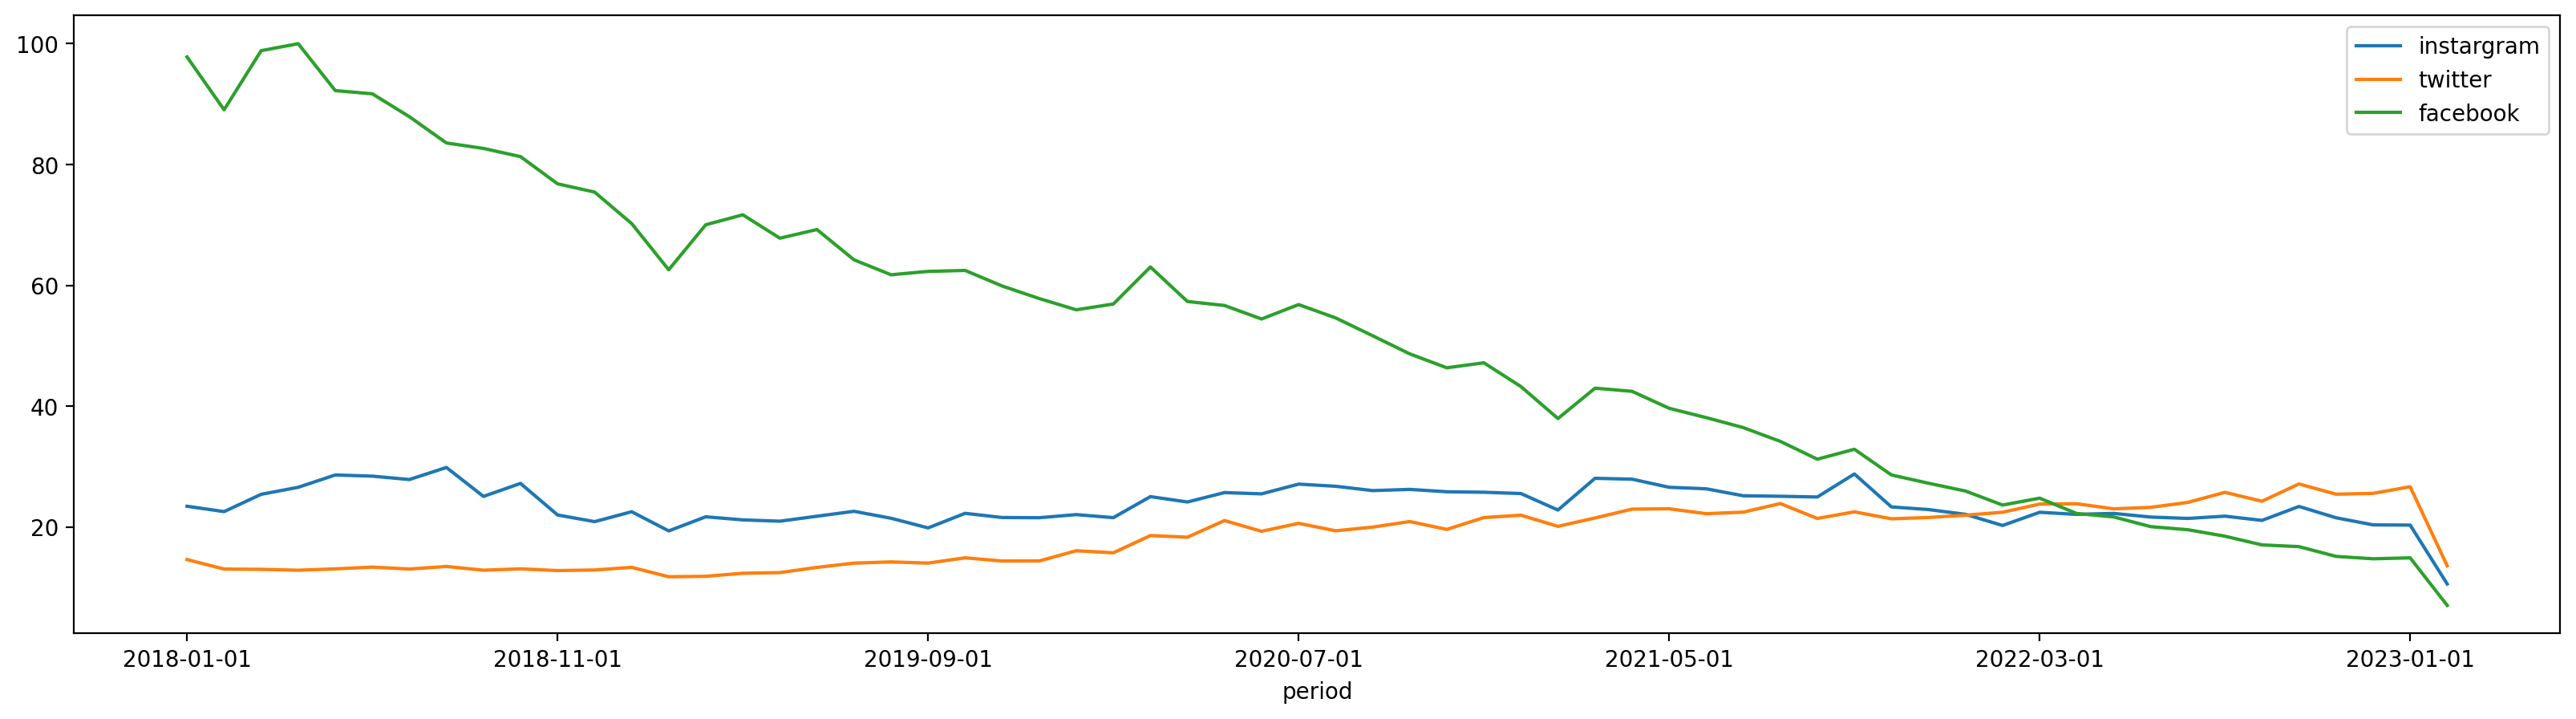

In [54]:
pivot_df.plot(figsize=(20,5))
plt.show()